### Bike Sharing Dataset 

- This project helps bike sharing companies to see the problem in advance by doing analysis and solve it using data visualization tools. 

#### Features

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weather_code" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('store_sharing.csv')
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


### Check Missing Values and Outliers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [15]:
print('First day:  {}\nLast day:   {}'.format(df.timestamp.min(), df.timestamp.max()))

First day:  2015-01-04 00:00:00
Last day:   2017-01-03 23:00:00


In [16]:
df.groupby('weather_code').size()

weather_code
1.0     6150
2.0     4034
3.0     3551
4.0     1464
7.0     2141
10.0      14
26.0      60
dtype: int64

#### "weather_code" category description:

- **1** = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- **2** = scattered clouds / few clouds 
- **3** = Broken clouds 
- **4** = Cloudy 
- **7** = Rain/ light Rain shower/ Light rain 
- **10** = rain with thunderstorm 
- **26** = snowfall 
- **94** = Freezing Fog

In [17]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [18]:
df.is_holiday.value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [19]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

Analyzed the correlation of variables using heatmap and observed that t1 and t2 are highly correlated with each other.

- ***t1*** - **real** temperature in C
- ***t2*** - **felt** temperature in C 

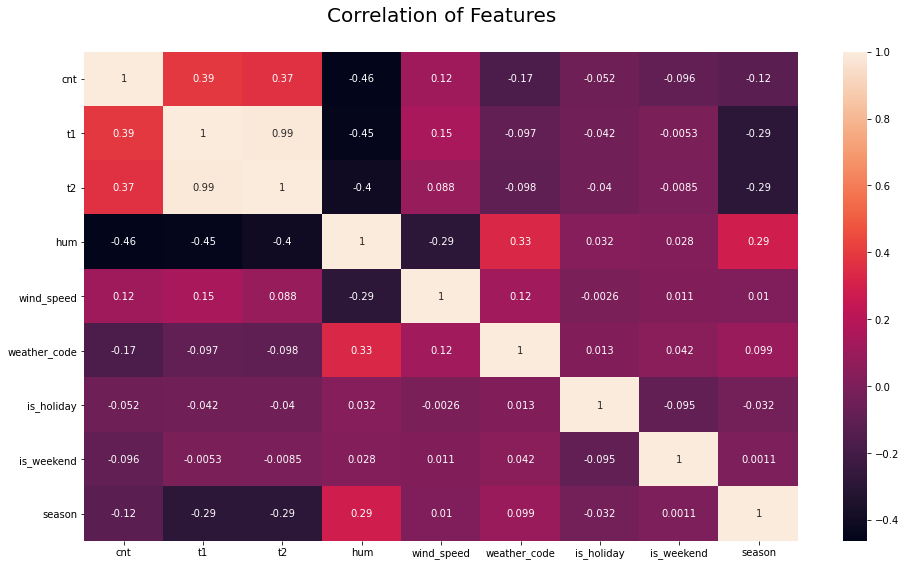

In [22]:
plt.figure(figsize=(16,9))
hm = sns.heatmap(df.corr(), annot=True)
hm.set_title('Correlation of Features', fontdict={'fontsize':20}, pad=30)
plt.show()

- There is negative linear relationship between humidity and count. 
- There is positive linear relationship between t1, t2, wind_speed and cnt. 

<Figure size 1008x648 with 0 Axes>

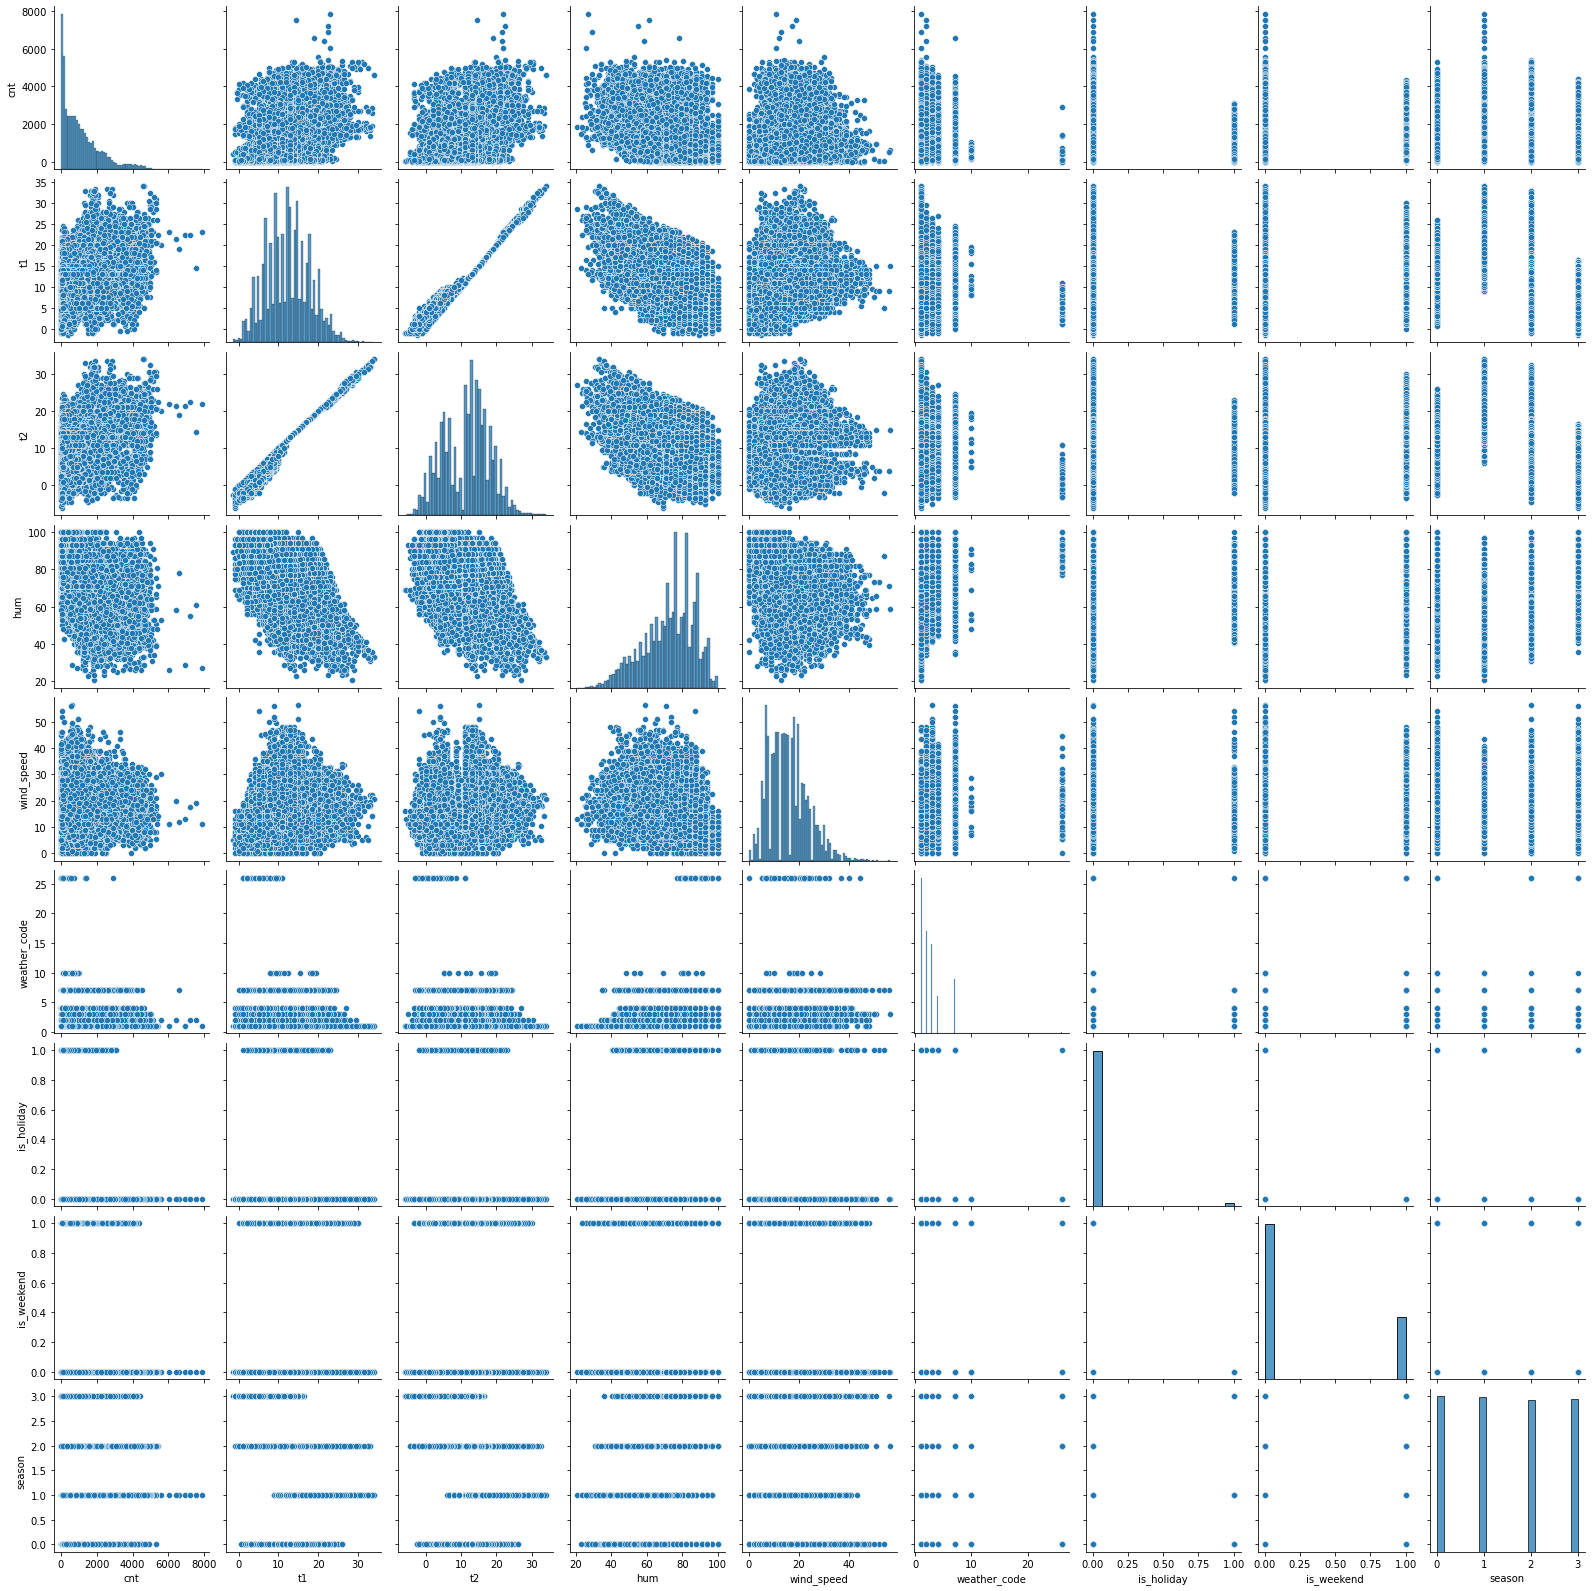

In [23]:
plt.figure(figsize=(14,9))
sns.pairplot(df)
plt.show()

In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df.timestamp[:3]

0   2015-01-04 00:00:00
1   2015-01-04 01:00:00
2   2015-01-04 02:00:00
Name: timestamp, dtype: datetime64[ns]

In [25]:
df['date'] = pd.DatetimeIndex(df['timestamp']).date
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df['weekday'] = pd.DatetimeIndex(df['timestamp']).weekday
df['weekdayname'] = pd.DatetimeIndex(df['timestamp']).day_name()

In [26]:
df['season_name'] = df.season.apply(lambda x:'Spring' if x==0 else 
                                        ('Summer' if x==1 else 
                                        ('Fall' if x==2 else 'Winter' )))

#### Bike shares over time

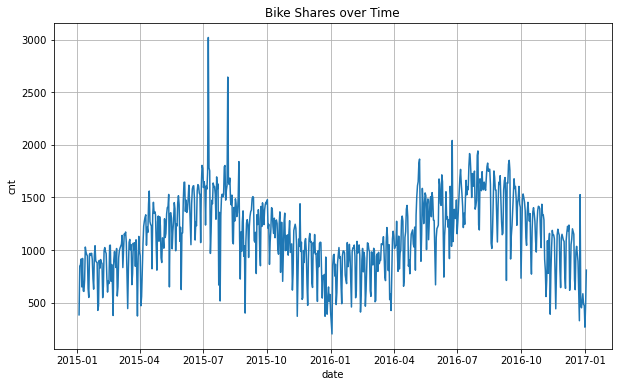

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date", y="cnt", data=df, err_style=None)
plt.grid(True)
plt.title("Bike Shares over Time")
plt.show()

#### Bike shares by months

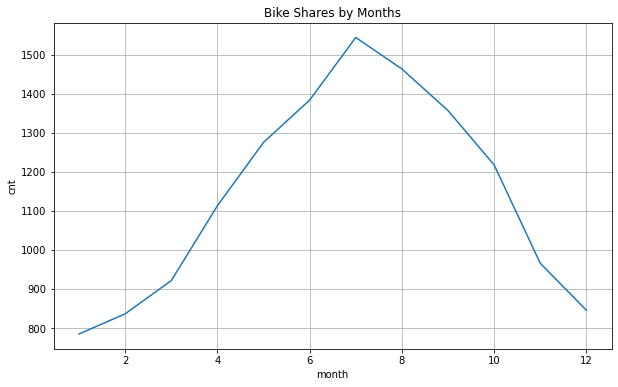

In [28]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.lineplot(x="month", y="cnt", data=df, err_style=None, ci=None)
plt.title("Bike Shares by Months")
plt.show()

#### Bike shares by hours for weekend or weekdays

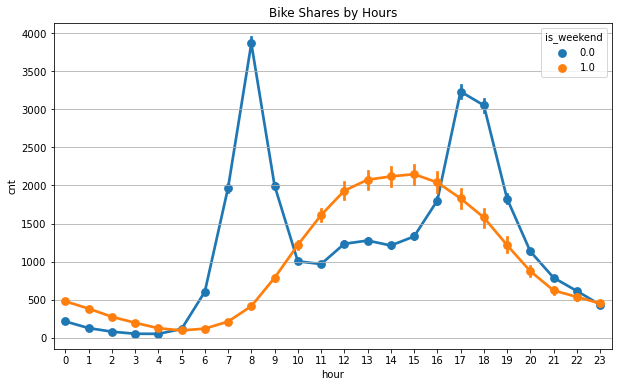

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True, zorder=0)
sns.pointplot(x="hour", y="cnt", data=df, hue='is_weekend', err_style=None, ci=95, zorder=2)
plt.title("Bike Shares by Hours")
plt.show()

#### Bike shares by season for each day of week

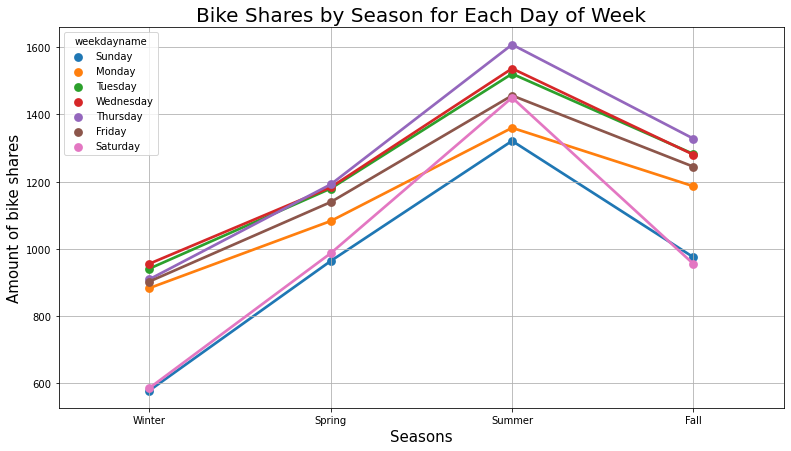

In [30]:
plt.figure(figsize=(13,7))
sns.pointplot(x="season_name", y="cnt", hue="weekdayname", data=df, err_style=None, ci=None)
plt.grid(True)
plt.title("Bike Shares by Season for Each Day of Week", fontsize=20)
plt.xlabel("Seasons", fontsize=15)
plt.ylabel('Amount of bike shares', fontsize=15)
plt.show()

#### Bike share by humidity

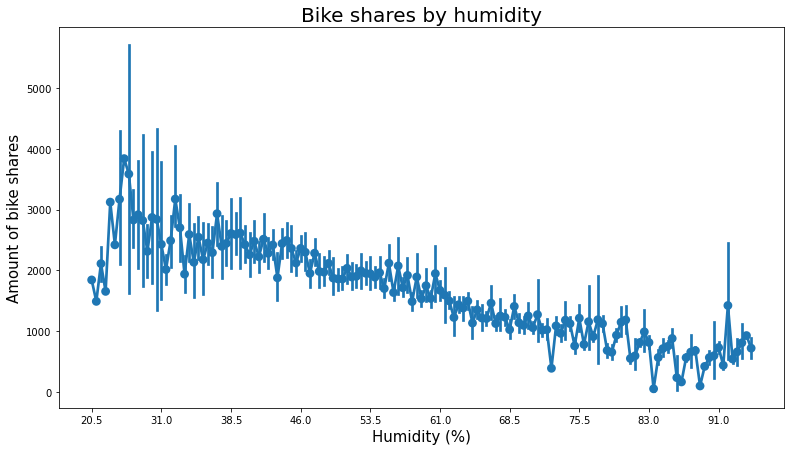

In [31]:
plt.figure(figsize=(13,7))
sns.pointplot(x='hum', y='cnt', data=df)
plt.title("Bike shares by humidity", fontsize=20)
plt.xlabel("Humidity (%)", fontsize=15)
plt.ylabel('Amount of bike shares', fontsize=15)
plt.locator_params(axis='x', nbins=10)
plt.show()

#### Bike share by real temperature

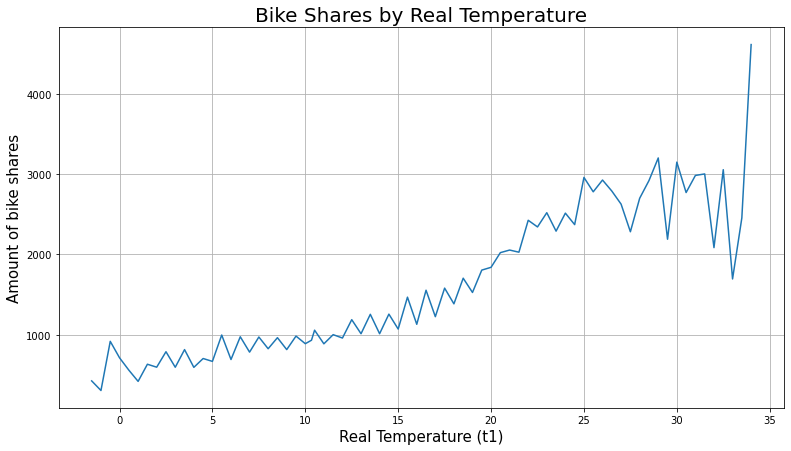

In [32]:
plt.figure(figsize=(13,7))
sns.lineplot(x="t1", y="cnt", data=df, err_style=None, ci=None)
plt.grid(True)
plt.title("Bike Shares by Real Temperature", fontsize=20)
plt.xlabel("Real Temperature (t1)", fontsize=15)
plt.ylabel('Amount of bike shares', fontsize=15)
plt.show()

#### Bike share by weather

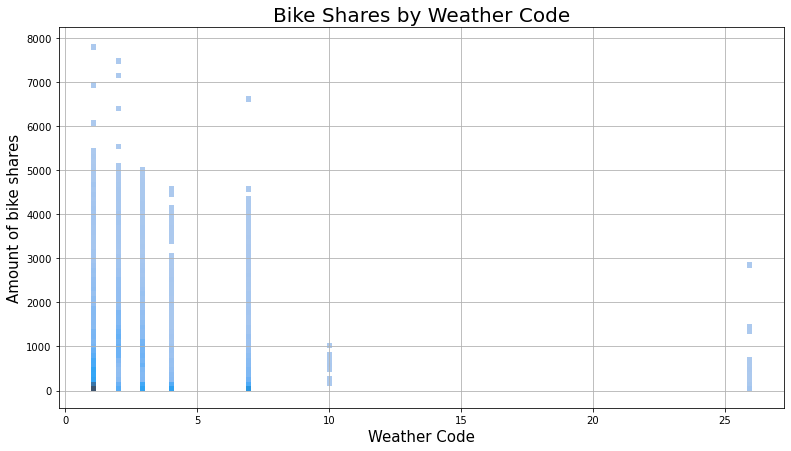

In [33]:
plt.figure(figsize=(13,7))
sns.histplot(x="weather_code", y="cnt", data=df)
plt.grid(True)
plt.title("Bike Shares by Weather Code", fontsize=20)
plt.xlabel("Weather Code", fontsize=15)
plt.ylabel('Amount of bike shares', fontsize=15)
plt.show()

#### The distribution of bike shares on not holidays by seasons

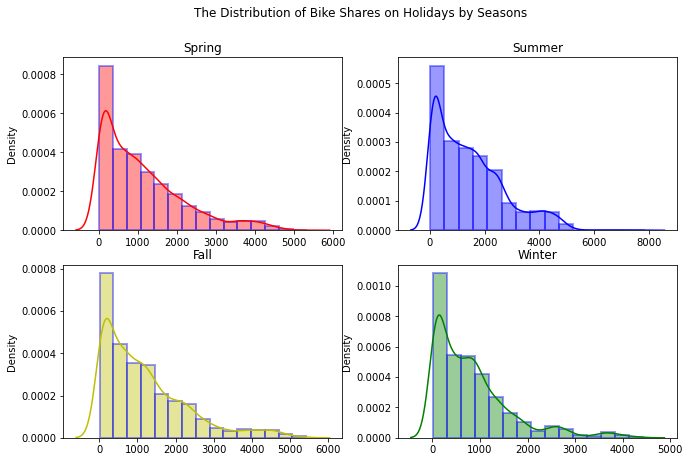

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(11,7))
fig.suptitle('The Distribution of Bike Shares on Holidays by Seasons')
sns.distplot(df.loc[df.season_name=="Spring"].loc[df.is_holiday==0, ["cnt"]], ax=ax1, color="r", bins=15, hist_kws={"linewidth":2, "edgecolor":"b"})
ax1.set_title("Spring")
sns.distplot(df.loc[df.season_name=="Summer"].loc[df.is_holiday==0, ["cnt"]], ax=ax2, color="b", bins=15, hist_kws={"linewidth":2, "edgecolor":"b"})
ax2.set_title("Summer")
sns.distplot(df.loc[df.season_name=="Fall"].loc[df.is_holiday==0, ["cnt"]], ax=ax3, color="y", bins=15, hist_kws={"linewidth":2, "edgecolor":"b"})
ax3.set_title("Fall")
sns.distplot(df.loc[df.season_name=="Winter"].loc[df.is_holiday==0, ["cnt"]], ax=ax4, color="g", bins=15, hist_kws={"linewidth":2, "edgecolor":"b"})
ax4.set_title("Winter")
plt.show()

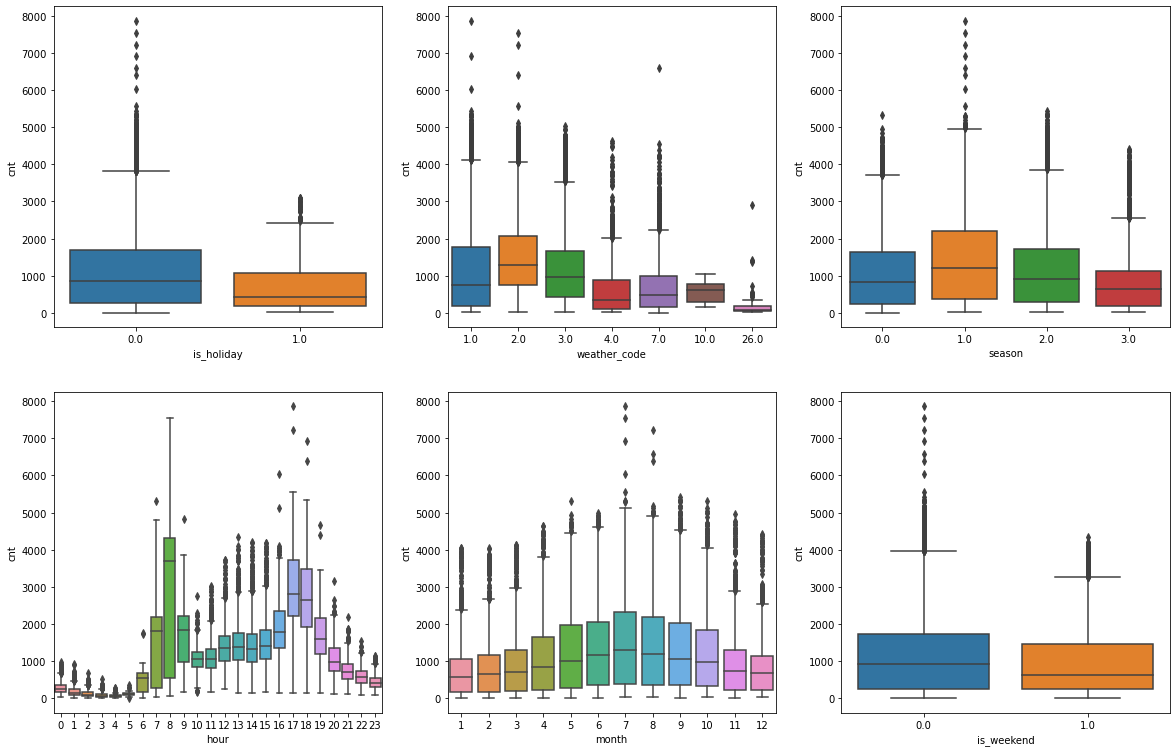

In [40]:
fig, ax = plt.subplots(2,3,figsize=(20,13))
sns.boxplot(data=df, x='is_holiday', y='cnt', ax=ax[0,0])
sns.boxplot(data=df, x='weather_code', y='cnt', ax=ax[0,1])
sns.boxplot(data=df, x='season', y='cnt', ax=ax[0,2])
sns.boxplot(data=df, x='hour', y='cnt', ax=ax[1,0])
sns.boxplot(data=df, x='month', y='cnt', ax=ax[1,1])
sns.boxplot(data=df, x='is_weekend', y='cnt', ax=ax[1,2])
plt.show()

- From the boxplots:<br>
 - Median is **lower** in **holidays**
 - Median is **higher** in **1, 2** and **3 weather codes**.
 - Median is **higher** in season(1) **summer**.
 - Median is **higher** during the hours of **7, 8, 9, 16, 17, 18** and **19.**
 - Median is **higher** in **5, 6, 7, 8** and **9**th **months.**
 - Median is **lower** on **weekends.**